In this notebook, we want  to predict "AER" from other features (except spend all, because of its linear relation to other features). Also, we study the effects of polynomial degree on model accuracy and performance. By choosing the best model, we will show our predictions.

Import Libraries

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# sklearn stuff
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Find Best Model(Best Poly): This method finds the best model according to Least MSE. For this purpose, we will increase the degree of the polynomial in each step and evaluate the performance, by test data. The model with the least MSE is the best.

In [ ]:
def best_polynomial(X_train, y_train, X_test, y_test):
  test_mses = []
  train_mses = []
  degrees = [i for i in range(1, 6)]
  for d in degrees:
      p_reg= Pipeline([
              ("std_scaler", StandardScaler()),
              ("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
              ("lin_reg", LinearRegression()),
          ])
      p_reg.fit(X_train, y_train)
      y_train_pred = p_reg.predict(X_train)
      train_mses.append(mean_squared_error(y_train, y_train_pred))
      y_test_pred = p_reg.predict(X_test)
      test_mses.append(mean_squared_error(y_test, y_test_pred))
  best_poly_deg = test_mses.index(min(test_mses))
  best_poly = Pipeline([
              ("std_scaler", StandardScaler()),
              ("poly_features", PolynomialFeatures(degree=best_poly_deg, include_bias=False)),
              ("lin_reg", LinearRegression()),
          ])
  best_poly.fit(X_train, y_train)
  plt.plot(degrees, train_mses, label='train')
  plt.plot(degrees, test_mses, label='test')
  plt.grid()
  plt.legend()
  plt.ylabel('mse loss')
  plt.xlabel('degree')
  plt.close()
  return best_poly

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [ ]:
PATH_TO_DATA = 'Affinity-City-Daily-final.csv'
#PATH_TO_DATA = '/content/drive/My Drive/ML/Affinity-City-Daily-final.csv'
Data = pd.read_csv(PATH_TO_DATA)

Drop "spend_all" Columun. Because "spend_all" has linear relation with other features

In [ ]:
Data = Data.drop(['spend_all'], axis=1)

We want to predict "AER" from other features

In [ ]:
X = Data[Data.columns[[4,6,7,8]]]
y = Data[Data.columns[5]]

Split Data to : 80 percent Train Size and 20 percent Test size

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Polynomial Regression(Linear Regression)

In [ ]:
p_reg= Pipeline([
        ("std_scaler", StandardScaler()),
        ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
p_reg.fit(X_train, y_train)
y_train_pred = p_reg.predict(X_train)
mean_squared_error(y_train, y_train_pred)
y_test_pred = p_reg.predict(X_test)
mean_squared_error(y_test, y_test_pred)

0.022262630722865714

Visualization Method

In [ ]:
def vis(y, y_pred):
    temp = [i for i in range(len(y))]
    plt.plot(temp, y_pred, color = 'blue', label='$Estimated Value$')
    plt.plot(temp, y, color= 'green', label='$True Value$')
    plt.grid()
    plt.legend()
    plt.title('Measured and estimated values')
    plt.xlabel('Time')
    plt.ylabel('Value')

Training 

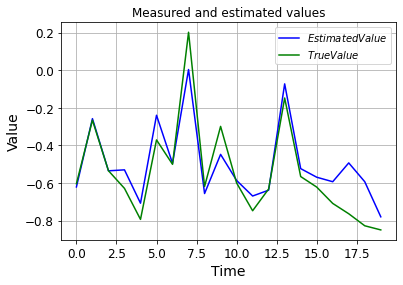

In [ ]:
vis(y_train[0:20], y_train_pred[0:20]) 


Test

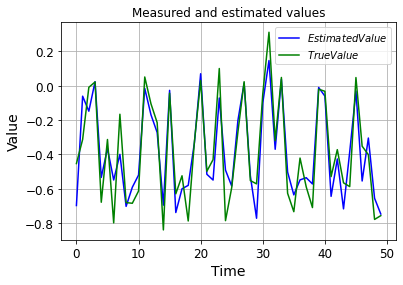

In [ ]:
vis(y_test[200:250], y_test_pred[200:250]) 

Find Best Polynomial

In [ ]:
best_poly = best_polynomial(X_train, y_train, X_test, y_test)

Use Best Model



In [ ]:
y_train_pred = best_poly.predict(X_train)
y_test_pred = best_poly.predict(X_test)
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(0.015945183643691935, 0.01805909602574794)

Evaluate Model on Train Data

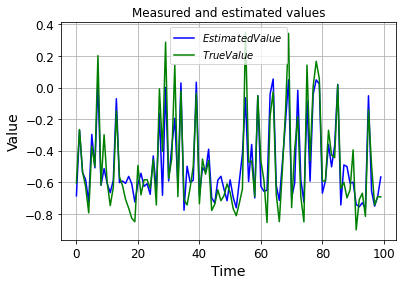

In [ ]:
vis(y_train[0:100], y_train_pred[0:100]) 

Evaluate Model on Test Data

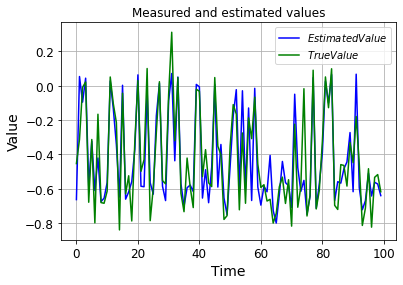

In [ ]:
vis(y_test[200:300], y_test_pred[200:300]) 

We can see a good generalization in our model, so we can argue that our model has escaped from underfitting and overfitting.
